In [1]:
#Установка необходимых модудей для работы кода
#! pip3 install pycodestyle flake8 pycodestyle_magic
#%load_ext pycodestyle_magic
#%pycodestyle_on
#!pip install wordcloud
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer() 
from pymystem3 import Mystem
m = Mystem()
import json
import pandas as pd
import collections
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elizavetashu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open('dostoevsky.txt', encoding='utf-8') as f:
    text = f.read()

In [3]:
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
analize_list = []
for token in words:
    token_analized = morph.parse(token)[0]
    analize_list.append(token_analized)
#Записываем text в analitics и затем записываем его в формат json
m = Mystem()
analitics = m.analyze(text)
with open("mystem.json","w", encoding="utf-8") as f:
    json.dump(analitics, f)

In [4]:
#Создадим датафрейм 
list_frame = []
lemmas = []
for token in analize_list:
    lemmas.append(token.normal_form)
    ch_dict = collections.OrderedDict()
    ch_dict["lex"]=token.normal_form
    ch_dict["word"]=token.word
    ch_dict["POS"]=token.tag.POS
    ch_dict["time"]=token.tag.tense
    ch_dict["gender"]=token.tag.gender
    ch_dict["case"]=token.tag.case
    ch_dict["verbal"]=token.tag.mood
    ch_dict["animacy"]=token.tag.animacy
    ch_dict["aspect"]=token.tag.aspect
    ch_dict["involvement"]=token.tag.involvement
    ch_dict["person"]=token.tag.person
    ch_dict["transitivity"]=token.tag.transitivity
    ch_dict["voice"]=token.tag.voice
    list_frame.append(ch_dict)
an_df = pd.DataFrame(list_frame).fillna('')
sp_an = pd.DataFrame(list_frame)
an_df.head(30)

,lex,word,POS,time,gender,case,verbal,animacy,aspect,involvement,person,transitivity,voice
0,михайлович,михайлович,NOUN,,masc,nomn,,anim,,,,,
1,достоевский,достоевский,NOUN,,masc,nomn,,anim,,,,,
2,преступление,преступление,NOUN,,neut,accs,,inan,,,,,
3,и,и,CONJ,,,,,,,,,,
4,наказание,наказание,NOUN,,neut,accs,,inan,,,,,
5,достоевский,достоевский,NOUN,,masc,nomn,,anim,,,,,
6,достоевский,достоевский,NOUN,,masc,nomn,,anim,,,,,
7,преступление,преступление,NOUN,,neut,accs,,inan,,,,,
8,и,и,CONJ,,,,,,,,,,
9,наказание,наказание,NOUN,,neut,accs,,inan,,,,,


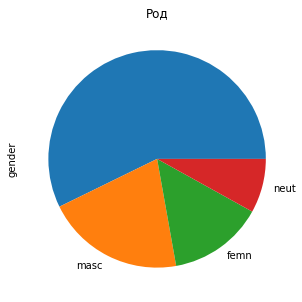

In [5]:
#Создадим круговую диаграмму, чтобы посмотреть примерное соотношение рода существительных
plt.figure(figsize=(5, 5))
an_df['gender'].value_counts().plot(kind='pie');
plt.title('Род');

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


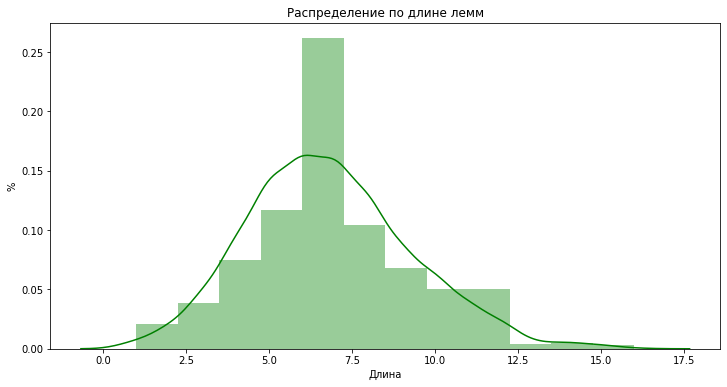

In [6]:
#Создадим столбчатую диаграмму, чтобы посмотреть примерное сраспределение по длине лемм
df2 = an_df[['lex', 'POS', 'gender']].groupby(['lex', 'POS'], as_index=False).count()
df2.columns = ['lex', 'POS', 'total']
df2 = df2[df2['total'] > 10]
df2['length'] = df2['lex'].apply(len)
plt.figure(figsize=(12, 6))
sns.distplot(df2['length'], bins=12, color='green')
plt.title('Распределение по длине лемм')
plt.ylabel('%')
plt.xlabel('Длина');

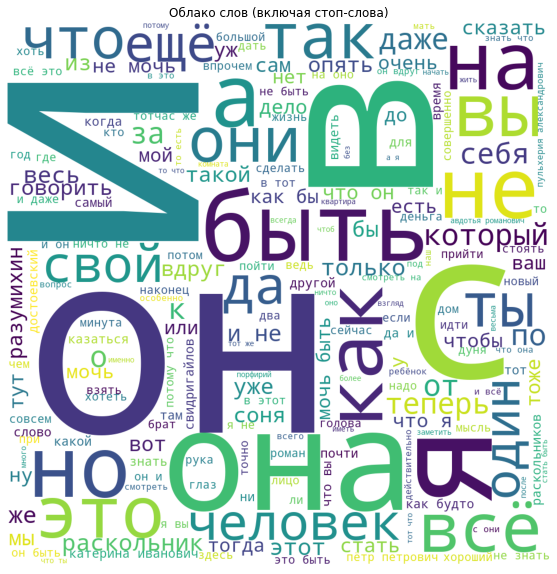

In [10]:
#Создадим облако из самых частотных слов
text = ' '.join([word for word in an_df['lex'].values])

wordcloud = WordCloud(
    background_color ='white',
    width = 1000,
    height = 1000, 
).generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

X: [1, 2, 3, 4, 5, 6]
Y: [4208, 4603, 4379, 4235, 4598, 2987]


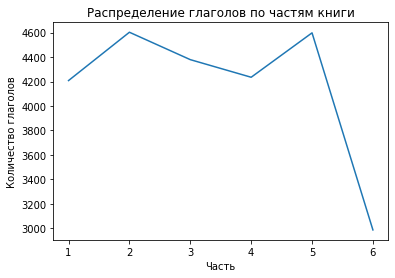

In [16]:
#Посмотрим на графике, какова частотность глаголов в 6 частях тескта "Преступление и наказание"
len(analize_list)
n = 1
list_book = [0]
verbs = []
while n <= 6:
    x = len(words) / 6 * n
    list_book.append(x)
    df3 = an_df['POS'][int(list_book[n-1]):int(list_book[n])]
    df3_new = df3.loc[an_df['POS'] == 'VERB']
    verbs.append(len(df3_new))
    n += 1
X = list(range(1, 7))
Y = verbs
print('X:', X)
print('Y:', Y)

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Распределение глаголов по частям книги') # заголовок
plt.ylabel('Количество глаголов') # подпись оси Х
plt.xlabel('Часть') # подпись оси Y
plt.show()

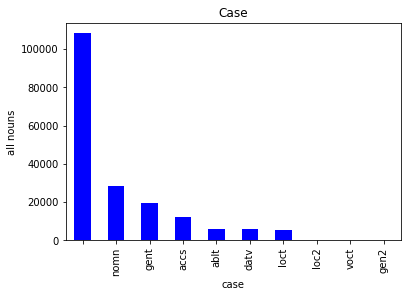

In [13]:
#С помощью столбачтой диаграммы рассмотрим, каково соотношение падежей по тексту
an_df['case'].value_counts().plot.bar(color='blue');
plt.title('Case')
plt.xlabel('case')
plt.ylabel('all nouns');